# APPS Data Science Interview

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Exploratory Data Analysis

### Reading the data

In [29]:
events = pd.read_csv("data/interview_events.csv", parse_dates=["client_ts"])
revenue = pd.read_csv("data/interview_revenue.csv", parse_dates=["revenue_day"])

In [30]:
events.head()

,user_id,client_ts,event_id,value,version,country_code,os_type
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android


In [31]:
revenue.head()

,user_id,revenue_day,revenue
0,7799779337307357843,2019-12-01,0.015406
1,2903532465681507879,2019-12-01,0.019093
2,7271844357181366660,2019-12-01,0.011785
3,-6989185766557698704,2019-12-01,0.013538
4,-1388044436100964633,2019-12-01,0.002288


### Check size of data cuz why not?

In [7]:
print(len(revenue))
print(len(events))

11301
1748861


### First things first need to seperate date values

In [36]:
events["year"] = events.client_ts.dt.year
events["month"] = events.client_ts.dt.month
events["day"] = events.client_ts.dt.day
events["hour"] = events.client_ts.dt.hour
events["minute"] = events.client_ts.dt.minute
events["seconds"] = events.client_ts.dt.second

revenue["year"] = revenue.revenue_day.dt.year
revenue["month"] = revenue.revenue_day.dt.month
revenue["day"] = revenue.revenue_day.dt.day

In [37]:
events.head()

,user_id,client_ts,event_id,value,version,country_code,os_type,year,month,day,hour,minute,seconds
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,45
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,55
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android,2019,12,1,17,36,56
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,4
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,6


In [38]:
revenue.head()

,user_id,revenue_day,revenue,year,month,day
0,7799779337307357843,2019-12-01,0.015406,2019,12,1
1,2903532465681507879,2019-12-01,0.019093,2019,12,1
2,7271844357181366660,2019-12-01,0.011785,2019,12,1
3,-6989185766557698704,2019-12-01,0.013538,2019,12,1
4,-1388044436100964633,2019-12-01,0.002288,2019,12,1


### Let's check if we need month and year values my guess is we don't (normally you don't do this)

In [40]:
print(events.year.unique())
print(events.month.unique())
print(revenue.year.unique())
print(revenue.month.unique())

[2019 2015]
[12 11  1]
[2019 2020]
[12  1]


### To my surprise there are actually more than one year and one month of data in this set
### So I'm gonna check if data from 2015 is sizeable enough to consider

In [47]:
events.reset_index().groupby("year").nunique()

,index,user_id,client_ts,event_id,value,version,country_code,os_type,year,month,day,hour,minute,seconds
year,,,,,,,,,,,,,,
2015,132,1,121,36,11,1,1,1,1,1,1,1,18,54
2019,1748729,1768,792898,2085,148599,5,12,1,1,2,23,24,60,60


### Data from 2015 has too small of a sample size so I'm just gonna drop it

In [49]:
print(len(events))
events = events[events.year != 2015]
len(events)

1748861


1748729

### Quick graph to show I can use matplotlib/seaborn but it shows no interesting information cuz I got no imagination

In [90]:
graph_data = events.reset_index().groupby("version").nunique()

In [91]:
graph_data = pd.DataFrame(graph_data.user_id)
graph_data.reset_index(inplace=True)

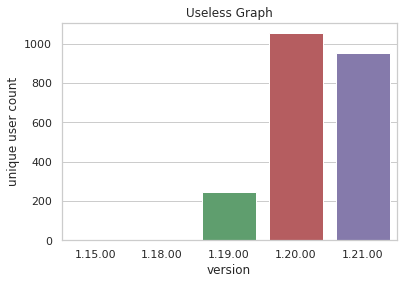

In [96]:
sns.set(style="whitegrid")
ax = sns.barplot(x="version", y="user_id", data=graph_data)

ax.set(xlabel="version", ylabel="unique user count", title="Useless Graph")

plt.show()

### To be fair it shows version 1.21 didn't gain many new users when it launched

### Need to get sign up dates of users for retention

In [119]:
signup_dates = pd.DataFrame(events.groupby("user_id").client_ts.min())

In [123]:
signup_dates.reset_index(inplace=True)
signup_dates.columns = ["user_id", "signup_date"]
signup_dates.head()

,user_id,signup_date
0,-9215534650345115924,2019-12-01 17:36:45+00:00
1,-9215240100939776087,2019-12-03 20:06:02+00:00
2,-9202484284851622629,2019-12-01 11:45:05+00:00
3,-9197151025395411316,2019-12-03 09:58:58+00:00
4,-9167946499694210868,2019-12-07 11:41:21+00:00


In [135]:
events = events.join(signup_dates.set_index("user_id"), on="user_id")
events.head()

,user_id,client_ts,event_id,value,version,country_code,os_type,year,month,day,hour,minute,seconds,signup_day,signup_date
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,45,NaT,2019-12-01 17:36:45+00:00
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,55,NaT,2019-12-01 17:36:45+00:00
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android,2019,12,1,17,36,56,NaT,2019-12-01 17:36:45+00:00
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,4,NaT,2019-12-01 17:36:45+00:00
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,6,NaT,2019-12-01 17:36:45+00:00
